# Multiple Linear Regression - Car Price Assignment

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# set_up options
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [3]:
# Load the dataset
car = pd.read_csv('CarPrice_Assignment.csv')

## Step 2: Cleaning and Manipulation

In [4]:
# Extract the company name from the 'CarName'
car['carCompany'] = car.CarName.apply(lambda x: x.split()[0])

In [5]:
# Remove 'car_ID' and 'CarName' as those columns don't add any information to the analysis
drop_columns = ['car_ID', 'CarName']
car.drop(drop_columns, inplace=True, axis=1)

In [6]:
# Convert values in the carCompany column to lower case
car.carCompany = car.carCompany.apply(lambda x: x.lower())

In [7]:
# Method to clean to typos in the carCompany column
def typos(x):
    if x == 'maxda':
        return 'mazda'
    elif x == 'porcshce':
        return 'porsche'
    elif x == 'toyouta':
        return 'toyota'
    elif x == 'vokswagen':
        return 'volkswagen'
    elif x == 'vw':
        return 'volkswagen'
    else:
        return x

In [8]:
# Correct the typos in the carCompany column
car.carCompany = car.carCompany.apply(typos)

In [9]:
# Let's look at the number of rows and column present
car.shape

(205, 25)

# Step 3: Data Visualization
**Visualising the Numeric Variables**<br>
Let's make a pair plot of all these variables

<Figure size 1440x1440 with 0 Axes>

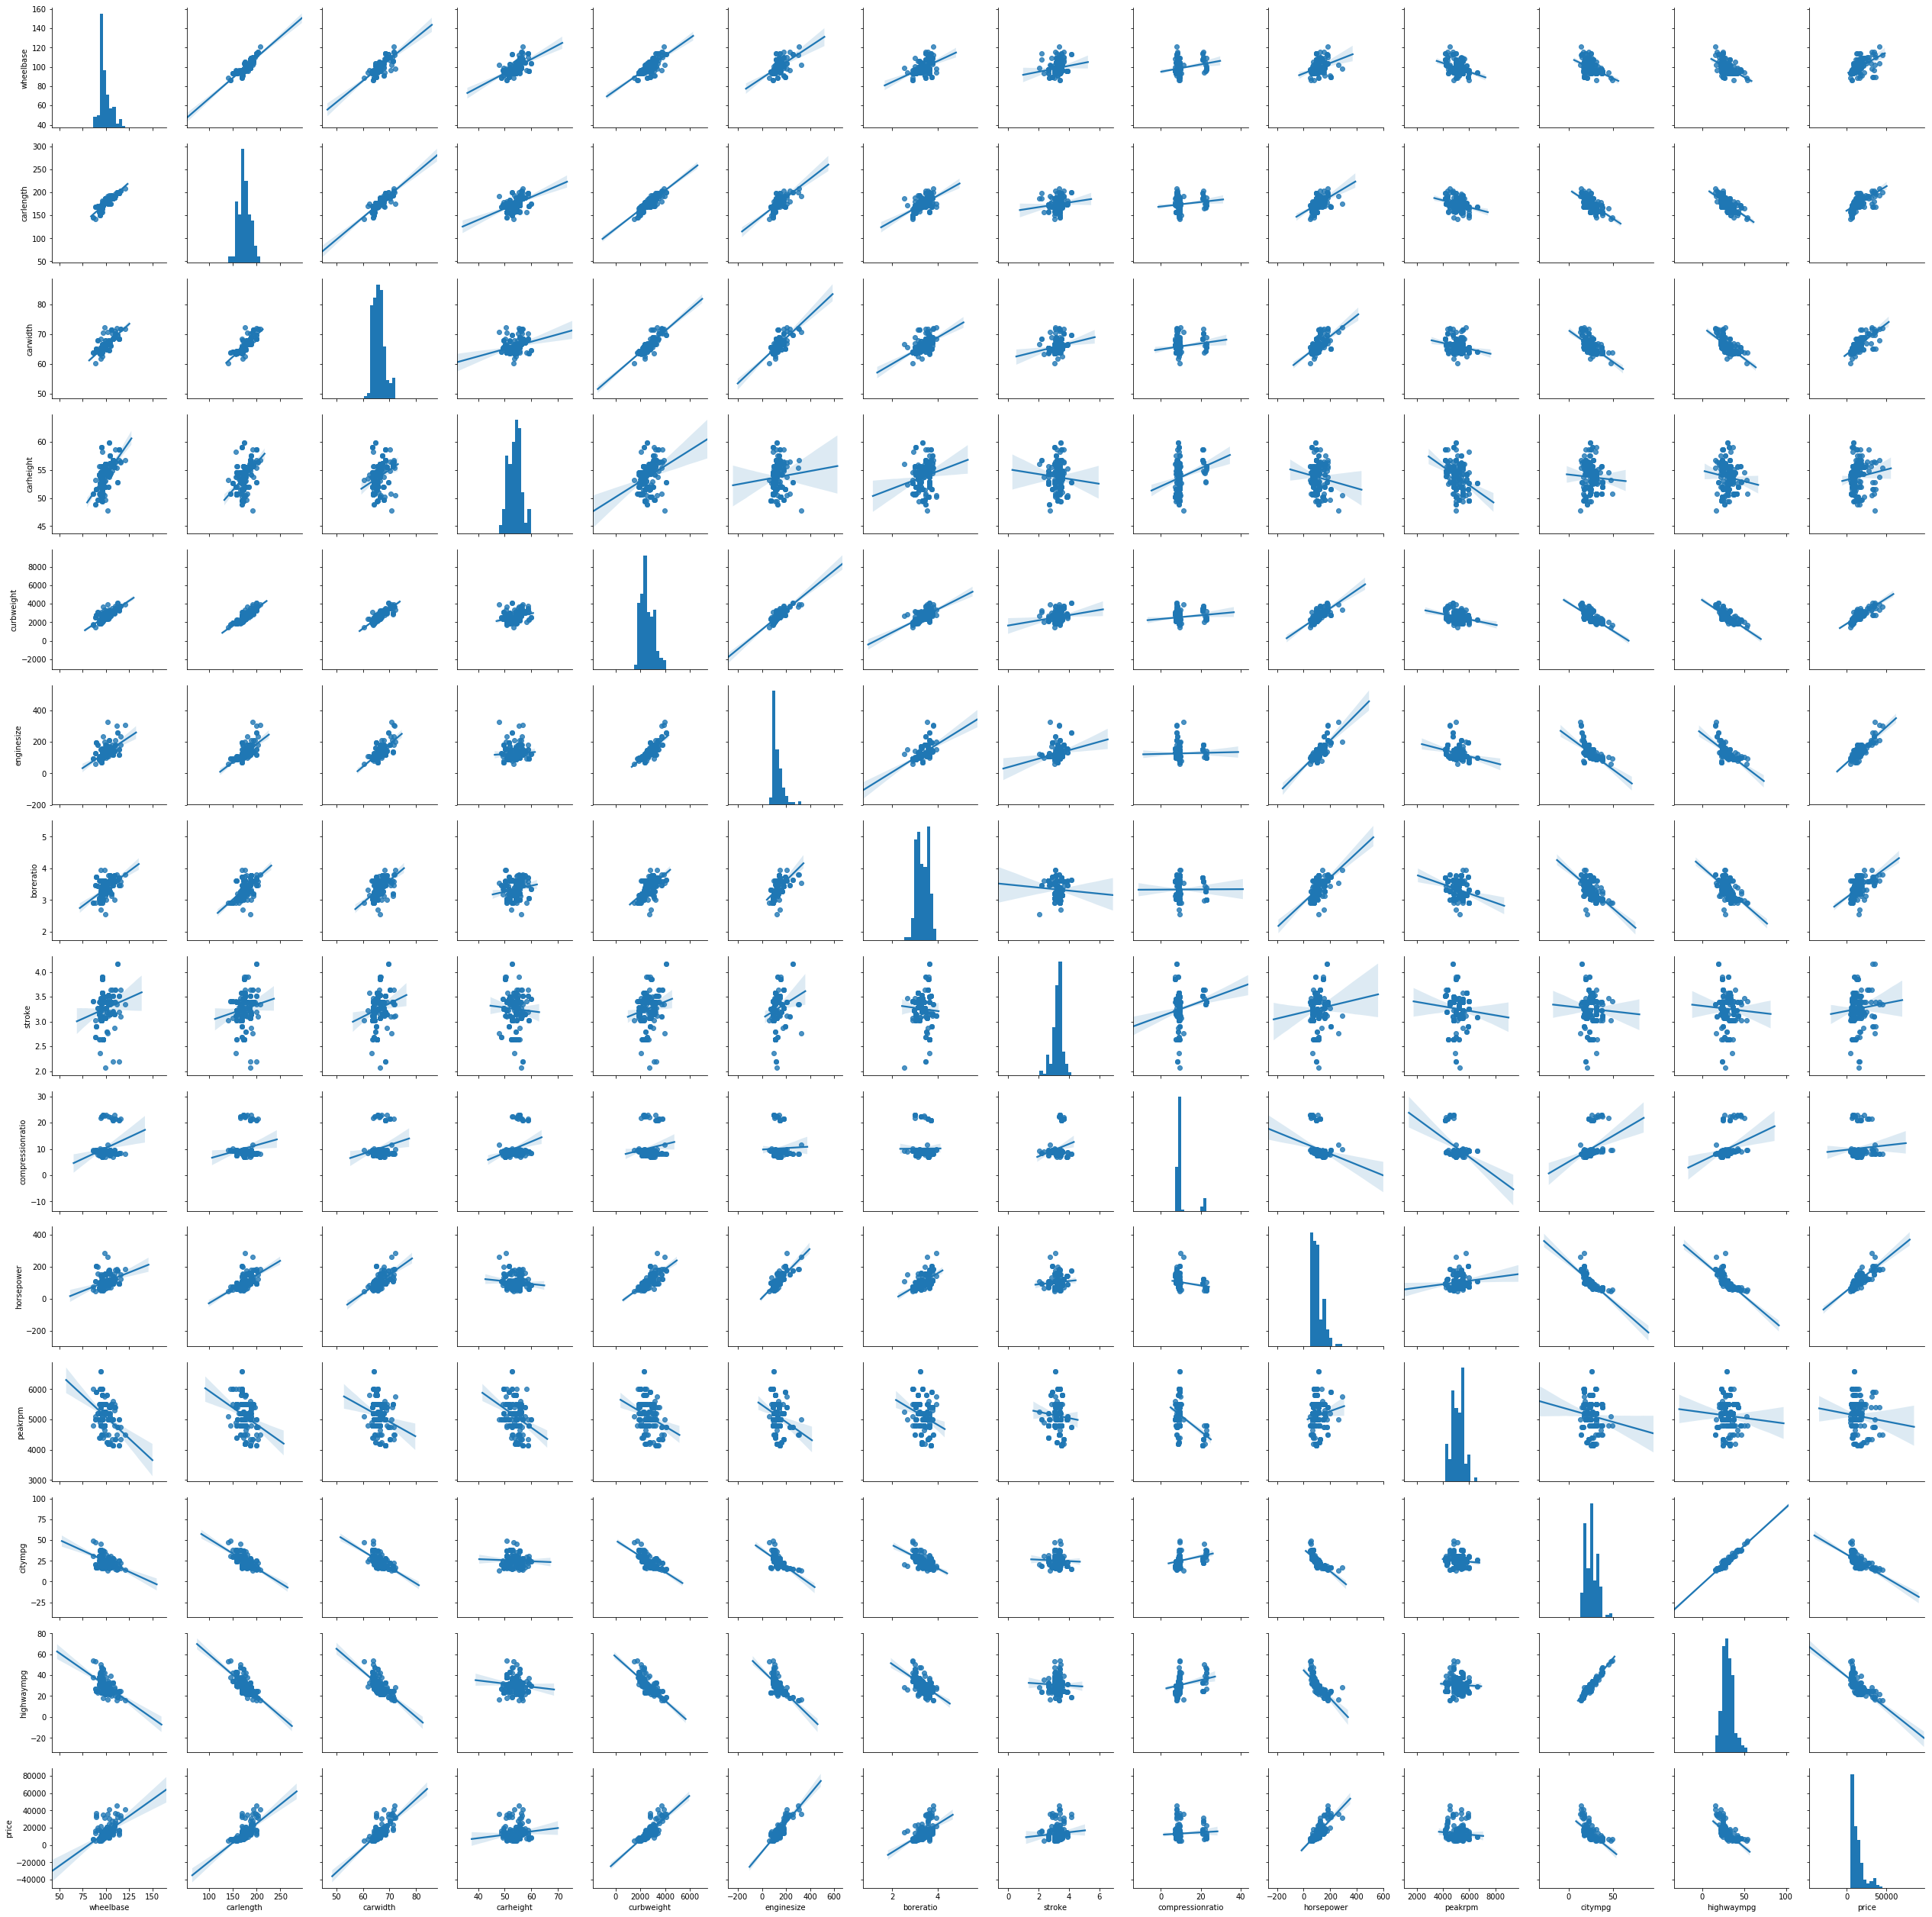

In [10]:
fig = plt.figure(figsize=(20,20))
sns.pairplot(car.drop('symboling', axis=1), kind="reg")
plt.show()

From the above plot we can see that columns: **wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower** have a positive correlation with the price, i.e. increase in these variables leads to increase in price.
<br>
Whereas, columns: **citympg, highwaympg** have a negative correlation.

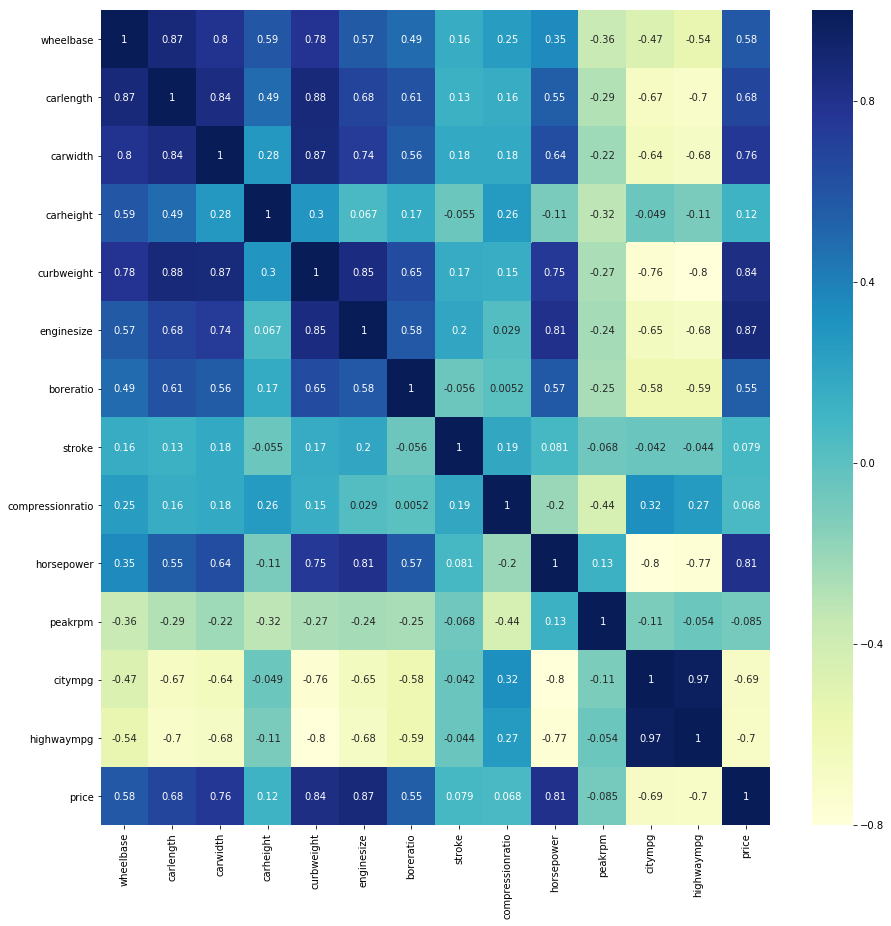

In [11]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(car.drop('symboling', axis=1).corr(), cmap="YlGnBu", annot = True)
plt.show()

**Visualising Categorical Variables** <br>
Using boxplots

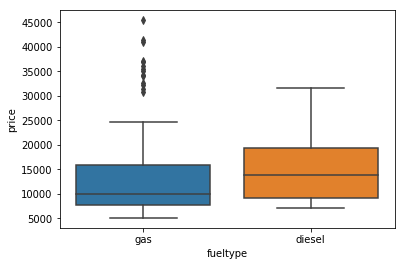

In [12]:
# fueltype column
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.show()

Here we can see that around 60% of the diesel data overlap with gas. It might not be a useful variable.

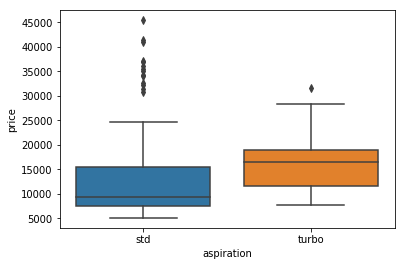

In [13]:
# aspiration column
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.show()

Here we can see that around 55% to 60% of the turbo data overlap with std. It might not be a useful variable.

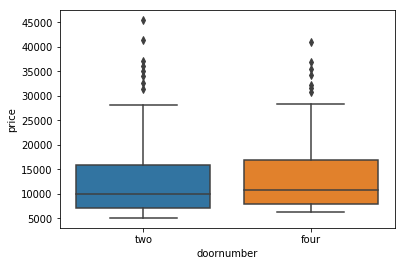

In [14]:
# doornumber column
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.show()


Here we can see that around 90% of the doornumber four data overlap with doornumber two. It might not be a useful variable.

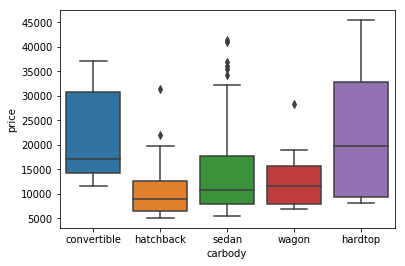

In [15]:
# carbody column
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.show()

Here we can see that hardtop cover most of the other variables and other also don't seem to be distinctive. Hence it might not be useful.

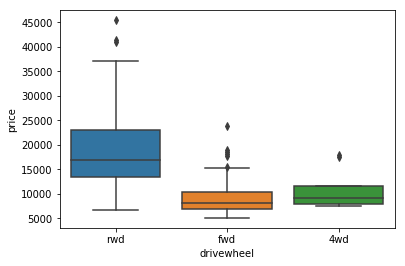

In [16]:
# drivewheel column
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.show()

Here we can see the drivewheel rwd does not overall fwd or 4wd. It might be useful but through further analysis we can find that.

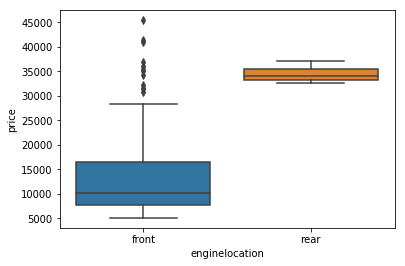

In [17]:
# enginelocation column
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.show()

Here enginelocation rear shows strong signs to be useful since it doesn't overalap with enginetype front.

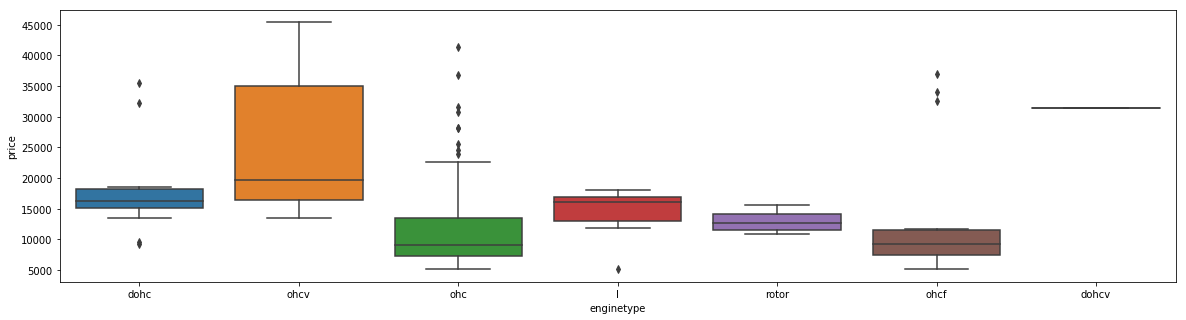

In [18]:
# enginetype column
fig = plt.figure(figsize=(20,5))
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.show()

Here enginetype ohvc shows good variation and might be useful. Other on the other hand does not show that much variation and show overlapping each other to some extent.

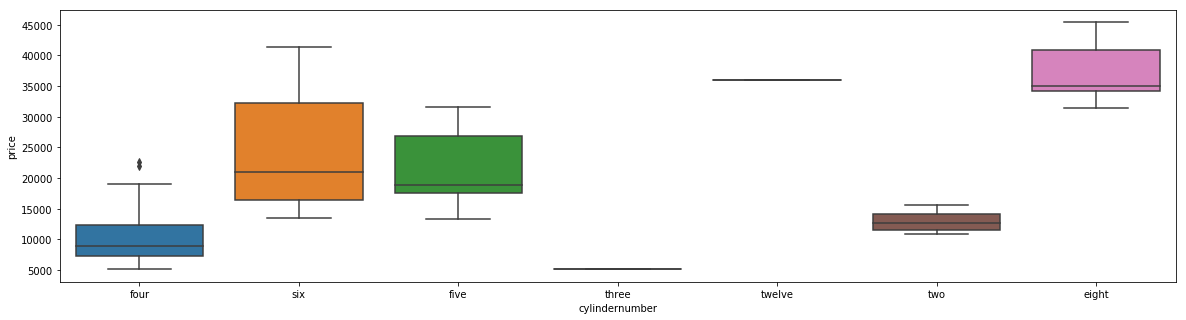

In [19]:
# cylindernumber column
fig = plt.figure(figsize=(20,5))
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.show()

Here cylindernumber eight shows distinctive characteristics, cylindernumber six shows good variation. Other on the other land are mostly overlapped by others.

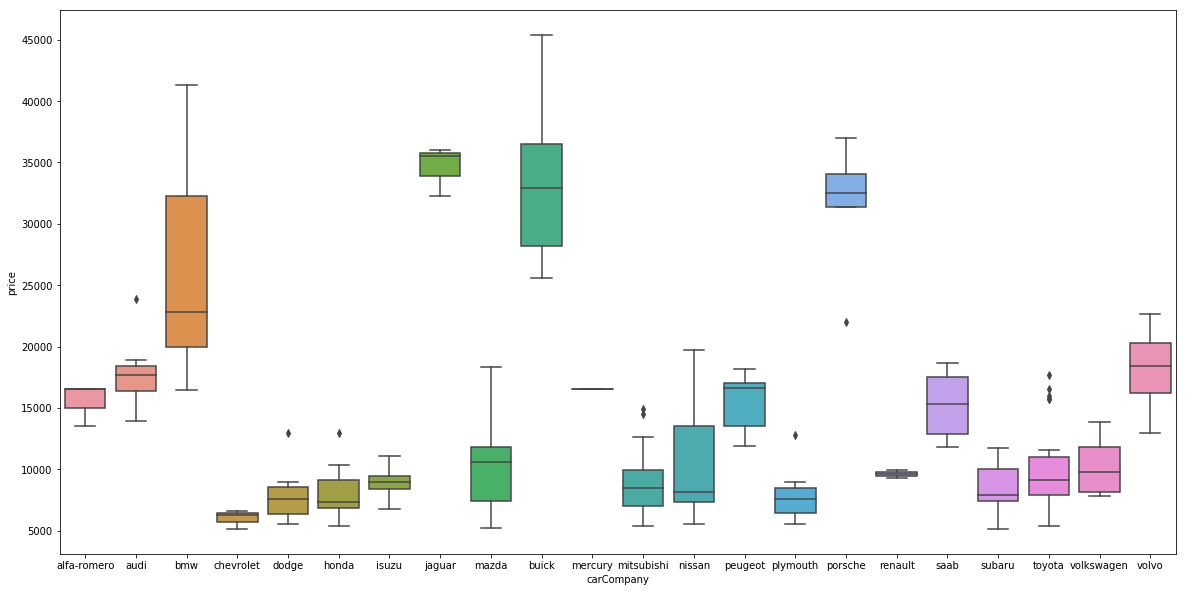

In [20]:
# carCompany column
fig = plt.figure(figsize=(20,10))
sns.boxplot(x = 'carCompany', y = 'price', data = car)
plt.show()

carCompany bmw and buick shows good variation. Jaguar and Porsche cars seem to be in the high price section since they belong in the top price section with low variation.

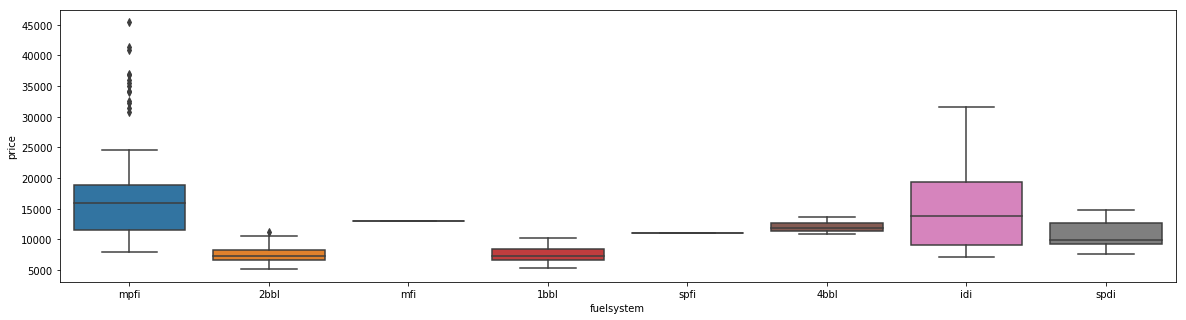

In [21]:
fig = plt.figure(figsize=(20,5))
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

fuelsystem seems to have most of the subtypes being overlapping each other to a great extent.

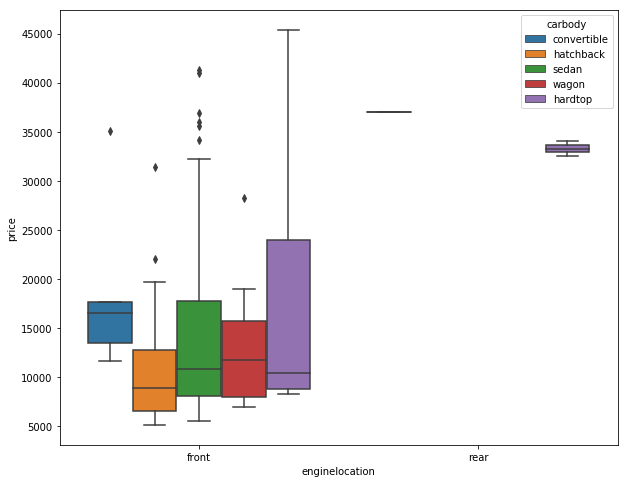

In [22]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(x='enginelocation', y='price', hue='carbody', data=car)

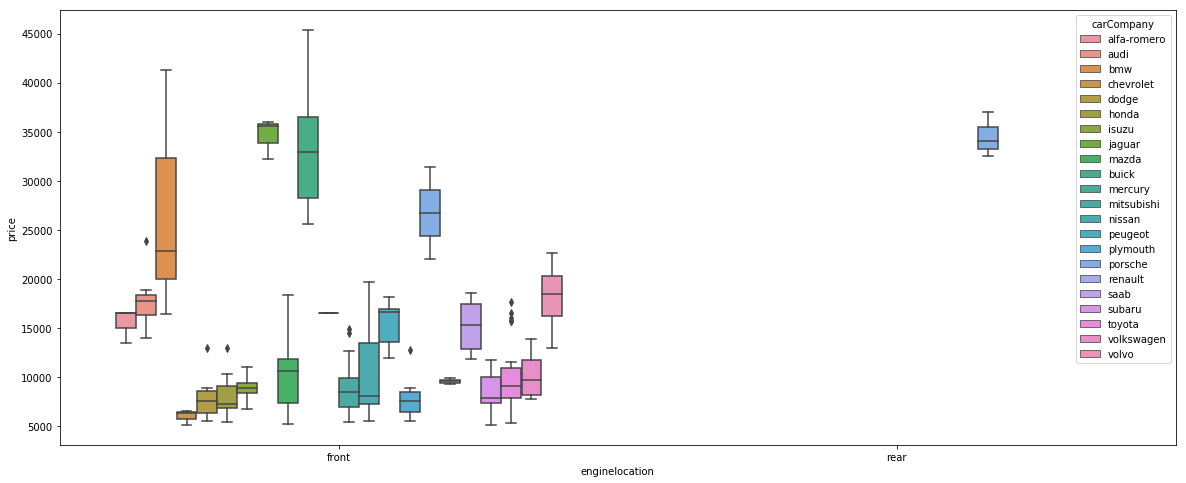

In [23]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(x='enginelocation', y='price', hue='carCompany', data=car)

Porsche is the only company having enginelocation rear.

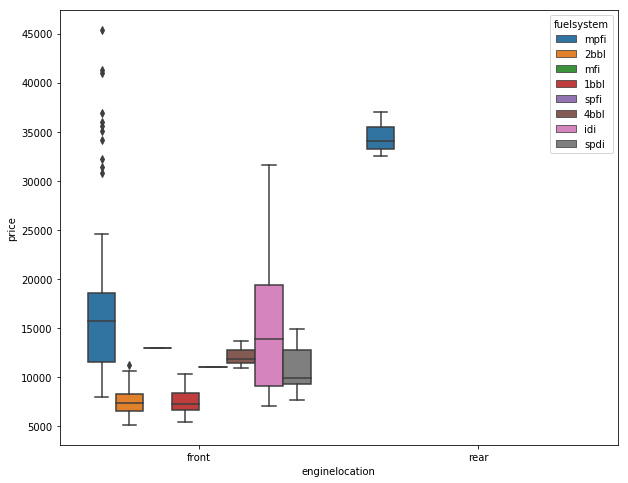

In [24]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(x='enginelocation', y='price', hue='fuelsystem', data=car)

## Step 4: Data Preparation

### Encoding with 1's and 0's
Since linear regression model cannot work with categorical variables, we need to convert them to numeric values.<br>
Encode the columns with two level's with 1's and 0's.

In [25]:
car.fueltype = car.fueltype.map({'gas': 1, 'diesel': 0})
car.aspiration = car.aspiration.map({'std': 1, 'turbo': 0})
car.doornumber = car.doornumber.map({'two': 1, 'four': 0})
car.enginelocation = car.enginelocation.map({'rear': 1, 'front': 0})

### Dummy Variables

Converting categorical variables having more than two level's using pandas get_dummies function.

In [26]:
# Converting drivewheel column
temp = pd.get_dummies(car['drivewheel'], prefix='drivewheel', drop_first=True)
car = pd.concat([car, temp], axis=1)
car.drop('drivewheel', inplace=True, axis=1)

In [27]:
# Converting carbody column
temp = pd.get_dummies(car['carbody'], prefix='carbody', drop_first=True)
car = pd.concat([car, temp], axis=1)
car.drop('carbody', inplace=True, axis=1)

In [28]:
# Converting enginetype column
temp = pd.get_dummies(car['enginetype'], prefix='enginetype', drop_first=True)
car = pd.concat([car, temp], axis=1)
car.drop('enginetype', inplace=True, axis=1)

In [29]:
# Converting cylindernumber column
temp = pd.get_dummies(car['cylindernumber'], prefix='cylindernumber', drop_first=True)
car = pd.concat([car, temp], axis=1)
car.drop('cylindernumber', inplace=True, axis=1)

In [30]:
# Converting carCompany column
temp = pd.get_dummies(car['carCompany'], prefix='carCompany', drop_first=True)
car = pd.concat([car, temp], axis=1)
car.drop('carCompany', inplace=True, axis=1)

In [31]:
# Converting fuelsystem column
temp = pd.get_dummies(car['fuelsystem'], prefix='fuelsystem', drop_first=True)
car = pd.concat([car, temp], axis=1)
car.drop('fuelsystem', inplace=True, axis=1)

In [32]:
# Converting symboling column
temp = pd.get_dummies(car['symboling'], prefix='symboling', drop_first=True)
car = pd.concat([car, temp], axis=1)
car.drop('symboling', inplace=True, axis=1)

In [33]:
# Let's look at the head of the dataframe
car.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,...,carCompany_chevrolet,carCompany_dodge,carCompany_honda,carCompany_isuzu,carCompany_jaguar,carCompany_mazda,carCompany_mercury,carCompany_mitsubishi,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,1,1,0,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,1,0,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.00,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,1,1,0,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.00,0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,1,0,0,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.00,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,1,0,0,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.00,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [34]:
# Look at the total number of rows and columns
car.shape

(205, 69)

## Step 5: Splitting the Data into Training and Testing Sets

In [35]:
# Importing train_test_split from sklearn
# and splitting the data into train and test having size 70% and 30% respectively.
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [36]:
# Import MinMaxScaler from sklearn and instantiate it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
# Apply scaler to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# fir_trainsform the columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Look at the head of the dataframe
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,...,carCompany_chevrolet,carCompany_dodge,carCompany_honda,carCompany_isuzu,carCompany_jaguar,carCompany_mazda,carCompany_mercury,carCompany_mitsubishi,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
122,1,1,0,0,0.24,0.43,0.29,0.27,0.27,0.14,0.23,0.53,0.15,0.08,0.55,0.50,0.57,0.07,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
125,1,1,1,0,0.27,0.45,0.67,0.21,0.50,0.34,1.00,0.46,0.16,0.40,0.55,0.17,0.27,0.47,0,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
166,1,1,1,0,0.27,0.45,0.31,0.42,0.31,0.14,0.44,0.45,0.15,0.27,1.00,0.36,0.32,0.12,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,1,1,0,0.07,0.45,0.32,0.09,0.41,0.26,0.63,0.25,0.12,0.26,0.35,0.22,0.27,0.31,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
199,1,0,0,0,0.61,0.78,0.58,0.86,0.65,0.26,0.75,0.48,0.03,0.48,0.39,0.11,0.14,0.38,0,1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('price')
X_train = df_train

### Building our model <br>
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE <br>
### RFE <br>
Recursive feature elimination

In [39]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
# Look at each column and its support and ranking respectively
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 19),
 ('aspiration', False, 7),
 ('doornumber', False, 45),
 ('enginelocation', True, 1),
 ('wheelbase', False, 8),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 20),
 ('horsepower', False, 3),
 ('peakrpm', False, 5),
 ('citympg', False, 29),
 ('highwaympg', False, 23),
 ('drivewheel_fwd', False, 51),
 ('drivewheel_rwd', False, 33),
 ('carbody_hardtop', False, 25),
 ('carbody_hatchback', False, 24),
 ('carbody_sedan', False, 26),
 ('carbody_wagon', False, 27),
 ('enginetype_dohcv', False, 6),
 ('enginetype_l', False, 2),
 ('enginetype_ohc', False, 48),
 ('enginetype_ohcf', False, 16),
 ('enginetype_ohcv', False, 40),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 21),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_tw

In [42]:
# Look at the columns that are choosen using RFE
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'carCompany_bmw', 'carCompany_peugeot',
       'carCompany_porsche'],
      dtype='object')

In [43]:
# Look at columns that are not choosen using RFE
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_six', 'carCompany_audi',
       'carCompany_buick', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercury', 'carCompany_mitsubishi',
       'carCompany_nissan', 'carCompany_plymouth', 'carCompany_renault',
       'carCompany_saab', 'carCompany_subaru', 'carCompany_toyota',
       'carCompany_volkswagen', 'carCompany_volvo', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling_-1',

## Step 6: Building model using statsmodel, for the detailed statistics

In [44]:
# Import statsmodels api and variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# train function takes X values and y values
# adds a constant and fits a line using the statsmodels api
# It prints the summary of the model build
# Also it prints the column names with the corresponding p-values in descending order
def train(X, y=y_train):
    X_train_lm = sm.add_constant(X)
    lm = sm.OLS(y, X_train_lm).fit()
    print(lm.summary())
    print()
    print('P-Values: \n')
    print(round(lm.pvalues, 3).sort_values(ascending=False))

In [46]:
# VIF function calculates the variance inflation factor
# It takes X values as input and calculates the 
# VIF values for each columns and returns a dataframe
# containing the VIF values corresponding to the column name
def VIF(X_new):
    vif = pd.DataFrame()
    X = X_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1

In [47]:
# Creating X_train_rfe dataframe with RFE selected variables from the X_train dataframe
X_train_rfe = X_train[col]

In [48]:
# Train the model
train(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.03e-70
Time:                        23:01:55   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

Since the p-values of all the variables is less than 0.05. All the variables are significant. Also let's check for Multicollinearity.

In [49]:
# Look at the VIF values
VIF(X_train_rfe)

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
3,enginesize,80.71
2,curbweight,54.10
1,carwidth,41.15
4,boreratio,34.56
5,stroke,30.89
8,cylindernumber_four,24.19
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.67


Since the VIF values for enginetype_rotor and cylindernumber_two is infinity. Let's first remove one and let's see what impact that has to the model. Remove enginetype_rotor.

In [50]:
# Remove enginetype_rotor
X_train_new = X_train_rfe.drop(["enginetype_rotor"], axis = 1)

### Model 2

In [51]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.03e-70
Time:                        23:01:55   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

Since the p-values of all the variables is less than 0.05. All the variables are significant. Also let's check for Multicollinearity.

In [52]:
# Look at the VIF values
VIF(X_train_new)

,Features,VIF
3,enginesize,80.71
2,curbweight,54.10
1,carwidth,41.15
4,boreratio,34.56
5,stroke,30.89
7,cylindernumber_four,24.19
10,cylindernumber_two,3.95
9,cylindernumber_twelve,2.81
6,cylindernumber_five,2.67
13,carCompany_porsche,1.93


Since the VIF values for enginesize is the highest. Remove enginesize.


In [53]:
# Remove enginesize.
X_train_new = X_train_new.drop(["enginesize"], axis = 1)

### Model 3

In [54]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           5.01e-61
Time:                        23:01:55   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

Since the p-value for cylindernumber_four is the highest and greater than 0.05 which indicates that it is insignificant. Remove cylindernumber_four.

In [55]:
# Remove cylindernumber_four
X_train_new.drop('cylindernumber_four', inplace=True, axis=1)

### Model 4

In [56]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           4.72e-62
Time:                        23:01:55   Log-Likelihood:                 189.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     130   BIC:                            -314.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

Since the p-value for cylindernumber_five is the highest and greater than 0.05 which indicates that it is insignificant. Remove cylindernumber_five.

In [57]:
# Remove cylindernumber_five
X_train_new.drop('cylindernumber_five', inplace=True, axis=1)

### Model 5

In [58]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           4.37e-63
Time:                        23:01:55   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

Since the p-value for stroke is the highest and greater than 0.05 which indicates that it is insignificant. Remove stroke.

In [59]:
# Remove stroke
X_train_new.drop('stroke', inplace=True, axis=1)


### Model 6

In [60]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           4.72e-64
Time:                        23:01:56   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

Since the p-value for cylindernumber_two is the highest and greater than 0.05 which indicates that it is insignificant. Remove cylindernumber_two.

In [61]:
# Remove cylindernumber_two
X_train_new.drop('cylindernumber_two', inplace=True, axis=1)

### Model 7

In [62]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.09e-64
Time:                        23:01:56   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

Since the p-values of all the variables is less than 0.05. All the variables are significant. Also let's check for Multicollinearity.

In [63]:
# Look at the VIF values
VIF(X_train_new)

,Features,VIF
1,carwidth,25.25
2,curbweight,23.05
3,boreratio,9.73
8,carCompany_porsche,1.64
0,enginelocation,1.57
7,carCompany_peugeot,1.18
6,carCompany_bmw,1.12
5,cylindernumber_twelve,1.07
4,cylindernumber_three,1.01


Since the VIF values for carwidth is the highest. Remove carwidth.

In [64]:
# Remove carwidth
X_train_new.drop('carwidth', inplace=True, axis=1)

### Model 8

In [65]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           5.28e-60
Time:                        23:01:56   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

Since the p-value for boreratio is the highest and greater than 0.05 which indicates that it is insignificant. Remove boreratio.

In [66]:
# Remove boreratio
X_train_new.drop('boreratio', inplace=True, axis=1)

### Model 9

In [67]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.97e-60
Time:                        23:01:56   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

Since the p-value for cylindernumber_three is the highest and greater than 0.05 which indicates that it is insignificant. Remove cylindernumber_three.

In [68]:
# Remove cylindernumber_three
X_train_new.drop('cylindernumber_three', inplace=True, axis=1)

### Model 10

In [69]:
# Train the model
train(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.77e-61
Time:                        23:01:56   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

In [70]:
# Look at the VIF values
VIF(X_train_new)

,Features,VIF
5,carCompany_porsche,1.55
0,enginelocation,1.50
1,curbweight,1.33
4,carCompany_peugeot,1.16
3,carCompany_bmw,1.09
2,cylindernumber_twelve,1.04


Since all the variables have p-values less than 0.05 which indicates they are significant and also their VIF values are less than 5 which indicates low multicollinearity. <br>
Hence we can stop removing any more variables and consider it as the optimal model for the train set.

### Residual Analysis of the train data
Check that the assumption holds true for the error terms having a normal distribution.

In [71]:
# Train the best model we get
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.77e-61
Time:                        23:01:56   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

In [72]:
# Calculate the y_train_pred
y_train_pred = lm.predict(X_train_lm)

Text(0, 0.5, 'y_train_pred')

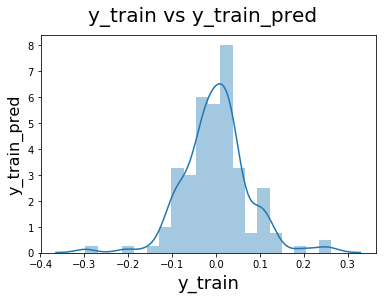

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)  

It shows a normal distribution with a little bump on the right side of the graph. Hence we can say that to some extent it follows normal distribution.

## Make Predictions

In [74]:
# Perform Min Max Scaling for the data in the test set
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [75]:
# Split the X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [76]:
# Consider only the columns that we got in the final model to predict
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)

In [77]:
# Making predictions
y_pred = lm.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

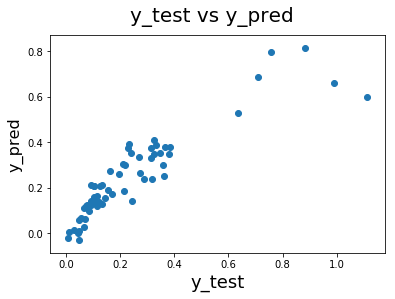

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Text(0.5, 0, 'Errors')

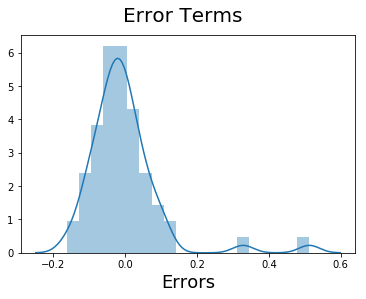

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

It follows a good normal distribution but has a two bumps on the right side. Might be due to some outlier.

Text(0, 0.5, 'Price')

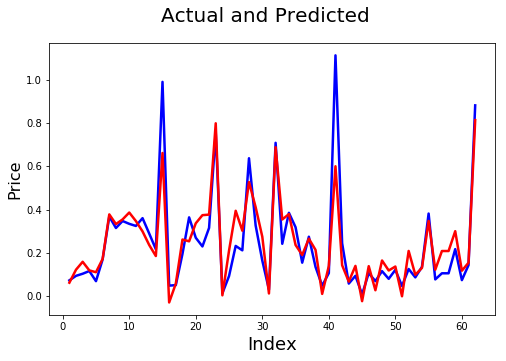

In [80]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(8,5))
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

The actual and predicted shows similar trend which is a good thing. 

### Look at the Metrics

In [81]:
# Import various metrics to look at the goodness of our model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
# Look at the MAE, MSE and RMSE
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)*100)
print('Mean Square Error: ', mean_squared_error(y_test, y_pred)*100)
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_pred))*100)

Mean Absolute Error:  6.350739370010778
Mean Square Error:  0.9997539610131603
Root Mean Square Error:  9.998769729387512


MSE values is low and can indicate that the model has done a good fit of the data. 

In [83]:
# Look at the R2 score for the train and test model
print('Train R2 Square: ', r2_score(y_train, y_train_pred)*100)
print('Test R2 Square: ', r2_score(y_test, y_pred)*100)

Train R2 Square:  88.2881709004953
Test R2 Square:  81.29491155105666


Difference between the train and test score is around 7 which is not bad and indicates that the model has done a good job in fitting the data.